In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = '../dados/obitos-2019.csv'
caminho_2020 = '../dados/obitos-2020.csv'

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f'2019 {dados_2019.shape}')
print(f'2020 {dados_2020.shape}')


2019 (12379, 6)
2020 (14852, 6)


In [2]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [3]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
13985,SP,INDETERMINADA,HOSPITAL,> 100,M,1
5809,MG,OUTRAS,IGNORADO,50 - 59,M,130
5716,GO,PNEUMONIA,HOSPITAL,50 - 59,M,209
13127,TO,COVID,HOSPITAL,90 - 99,M,24
9552,RJ,INDETERMINADA,OUTROS_SERVICOS_SAUDE,70 - 79,F,42


In [9]:
len(dados_2020.uf.unique())

27

In [10]:
dados_2020.tipo_doenca.unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [11]:
dados_2019.tipo_doenca.value_counts()

OUTRAS                        3845
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2323
SEPTICEMIA                    2063
INDETERMINADA                 1307
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [18]:
total_obitos_2020 = dados_2020.groupby('tipo_doenca').sum()
total_obitos_2020

,total
tipo_doenca,
COVID,192939
INDETERMINADA,9571
INSUFICIENCIA_RESPIRATORIA,97859
OUTRAS,681820
PNEUMONIA,180222
SEPTICEMIA,161196
SRAG,16391


In [19]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca').sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6984
INSUFICIENCIA_RESPIRATORIA,100499
OUTRAS,659849
PNEUMONIA,226194
SEPTICEMIA,175433
SRAG,1498


In [20]:
propocao = total_obitos_2020 / total_obitos_2019
propocao

,total
tipo_doenca,
COVID,192939.000000
INDETERMINADA,1.370418
INSUFICIENCIA_RESPIRATORIA,0.973731
OUTRAS,1.033297
PNEUMONIA,0.796759
SEPTICEMIA,0.918847
SRAG,10.941923


### Desafio 02

In [64]:
# Obitos de COVID separados por faixa etária e sexo normalizados pelo total

obitos_por_sexo_e_idade = pd.crosstab(index = dados_2020.faixa_etaria, columns=[dados_2020[dados_2020.tipo_doenca == 'COVID'].tipo_doenca, dados_2020.sexo], values=dados_2020.total, aggfunc='sum', normalize=True).round(3)*100

obitos_por_sexo_e_idade['total'] = obtios_por_sexo_e_idade['COVID']['F'] + obitos_por_sexo_e_idade['COVID']['M'] + obitos_por_sexo_e_idade.COVID.I
obitos_por_sexo_e_idade

tipo_doenca  COVID            total
sexo             F    I     M      
faixa_etaria                       
10 - 19        0.1  0.0   0.1   0.2
20 - 29        0.4  0.0   0.5   0.9
30 - 39        1.0  0.0   1.5   2.5
40 - 49        2.2  0.0   3.7   5.9
50 - 59        4.3  0.0   7.2  11.5
60 - 69        8.4  0.0  13.0  21.4
70 - 79       10.7  0.0  15.4  26.1
80 - 89       10.3  0.0  11.7  22.0
90 - 99        4.7  0.0   3.6   8.3
< 9            0.2  0.0   0.2   0.4
> 100          0.4  0.0   0.2   0.6
N/I            0.1  0.0   0.1   0.2

Pode-se notar um alto percentual de mortes nas pessoas acimas de 70 anos e a taxa de obito é sempre menor para as mulheres até chegar na faixa de 90-99 anos. Acredito que isso ocorra pois não sobram muitos homens para morrer, ou seja, a população de mulheres deve ser menor.

## Criação de funcão para plotar gráfico

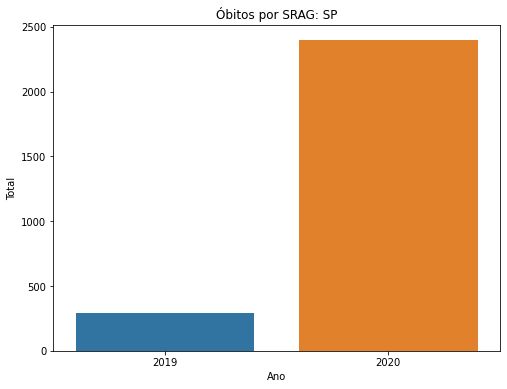

In [206]:
def grafico_comparativo(causa = 'Todas doenças', estado = 'Brasil'):

    estados = dados_2019.uf.unique()
    
    if estado != 'Brasil':
        if estado in estados:
            seletor_estado_2019 = dados_2019.uf == estado
            seletor_estado_2020 = dados_2020.uf == estado
            total_2019 = dados_2019[seletor_estado_2019].groupby('tipo_doenca').sum()
            total_2020 = dados_2020[seletor_estado_2020].groupby('tipo_doenca').sum()
        else:
            print('Estado {estado} não encontrado')
            return
    if not estado:
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()

    
    if causa == 'Todas':
        dados = pd.concat([total_2019, total_2020], keys=['2019','2020']).reset_index()
        
        plt.figure(figsize=(12,6))
        plt.title(f'Óbitos por {causa}: {estado}')
        sns.barplot(x = 'tipo_doenca', y = 'total', hue = 'level_0', data = dados)
        plt.legend(title='Ano')
        plt.xticks(rotation=13)
                             
    else:
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
        dados = pd.DataFrame({'Total' : lista,
                            'Ano' : [2019, 2020]})

        plt.figure(figsize=(8,6))
        plt.title(f'Óbitos por {causa}: {estado}')
        sns.barplot(x = 'Ano', y = 'Total', data = dados)

    plt.show()

grafico_comparativo('SRAG', 'SP')